# Regression in Python

***
* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. 
***

In [4]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn


# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

***
# Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 

In [5]:
bos = pd.read_csv('boston.csv')
print(bos.shape)
bos.head()

(506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [6]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [7]:
bos.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

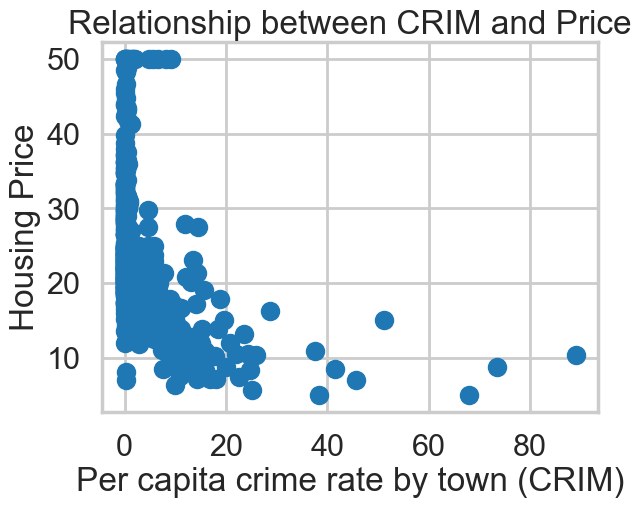

In [8]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

In [9]:
# describe relationship
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

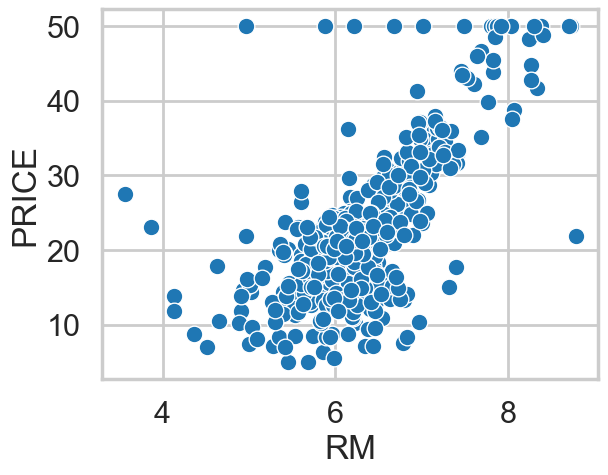

In [10]:
sns.scatterplot(x=bos["RM"], y=bos["PRICE"])
plt.show()

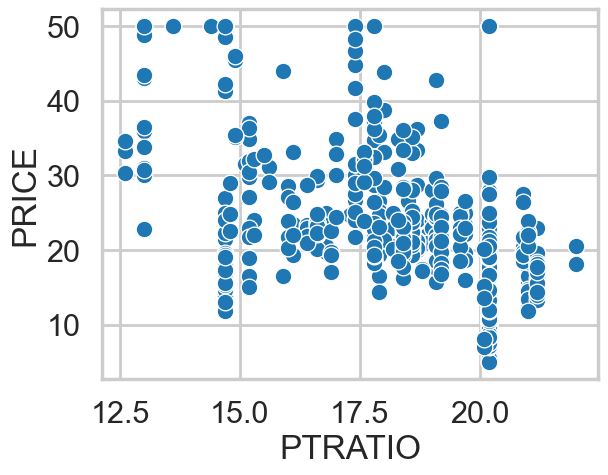

In [11]:
# scatter plot between *PTRATIO* and *PRICE*
sns.scatterplot(x=bos["PTRATIO"], y=bos["PRICE"])
plt.show()

<Axes: xlabel='CRIM', ylabel='INDUS'>

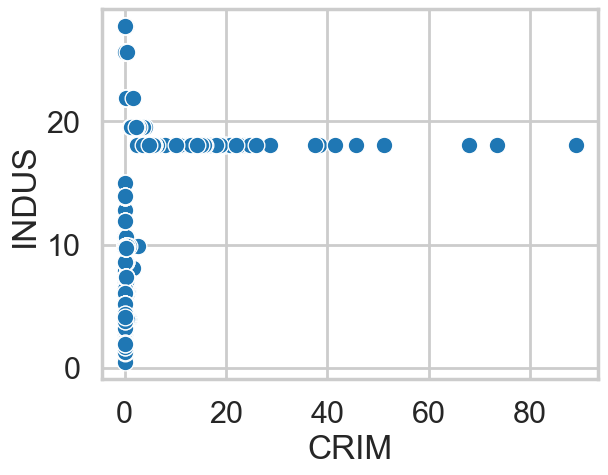

In [12]:
sns.scatterplot(x=bos["CRIM"], y=bos["INDUS"])

### Scatterplots using Seaborn

<Axes: xlabel='CRIM', ylabel='PRICE'>

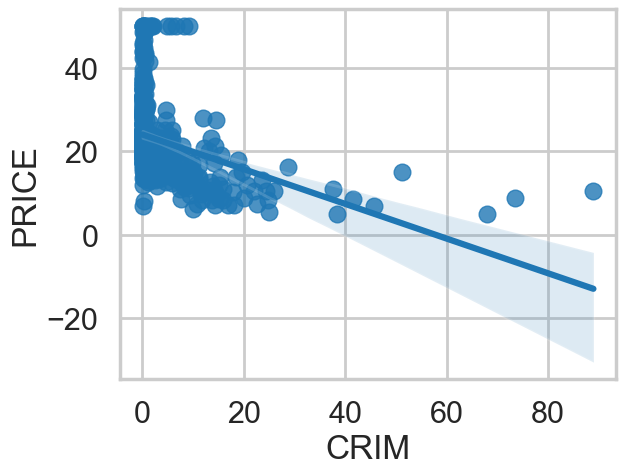

In [13]:
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)

### Histograms
***

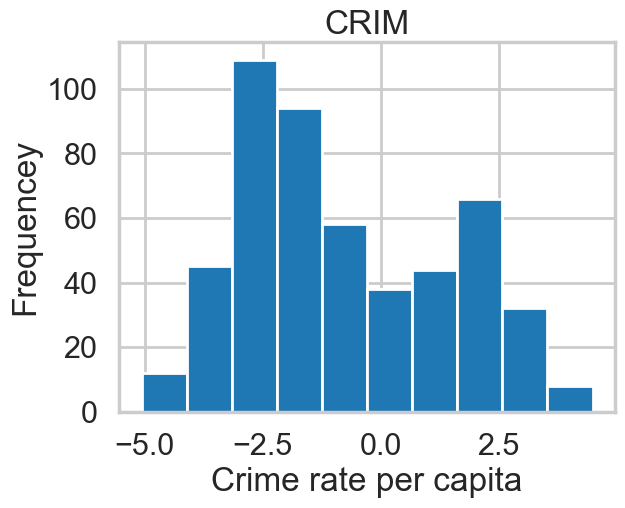

In [14]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

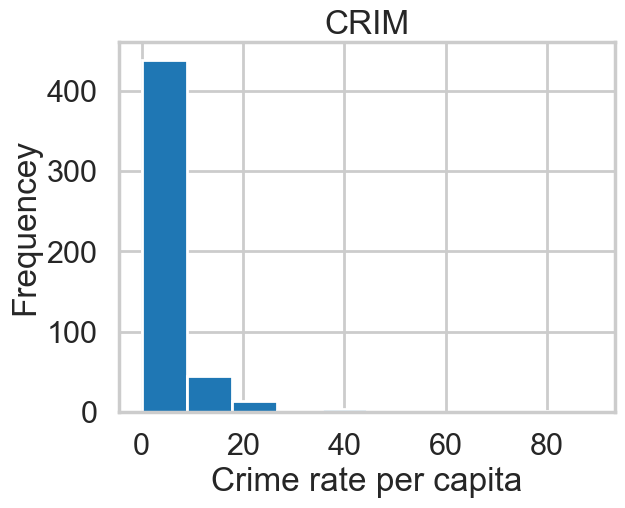

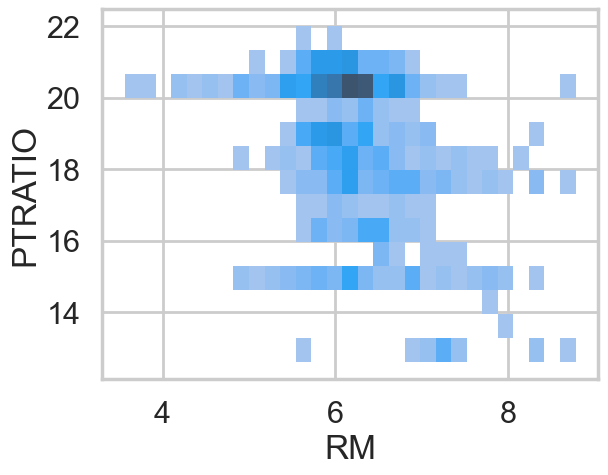

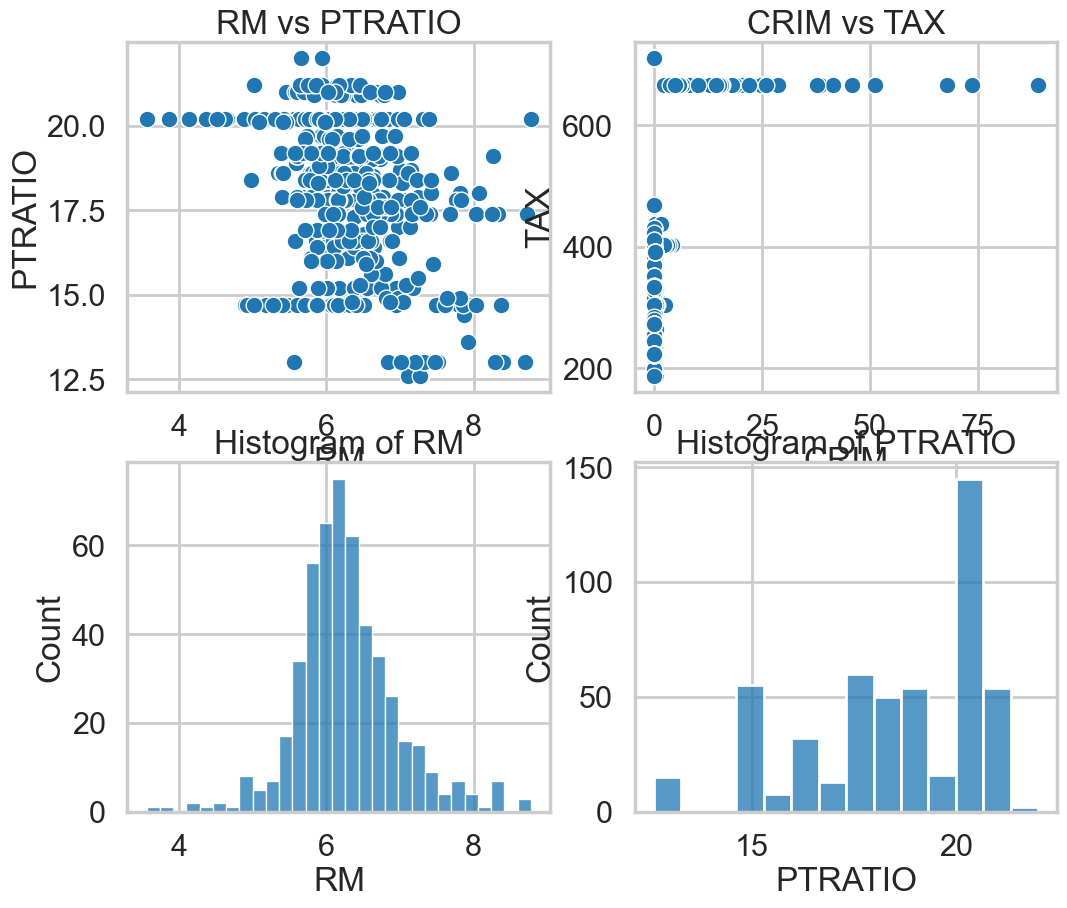

In [15]:

plt.hist((bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

sns.histplot(x=bos["RM"], y=bos["PTRATIO"])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x=bos["RM"], y=bos["PTRATIO"], ax=axes[0, 0])
axes[0, 0].set_title("RM vs PTRATIO")

sns.scatterplot(x=bos["CRIM"], y=bos["TAX"], ax=axes[0, 1])
axes[0, 1].set_title("CRIM vs TAX")

sns.histplot(bos["RM"], ax=axes[1, 0])
axes[1, 0].set_title("Histogram of RM")

sns.histplot(bos["PTRATIO"], ax=axes[1, 1])
axes[1, 1].set_title("Histogram of PTRATIO")

plt.show()


Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [16]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
# statsmodels works nicely with pandas dataframes
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           2.49e-74
Time:                        14:30:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

Text(0.5, 1.0, 'Scatterplot of Predicted vs. Original Prices')

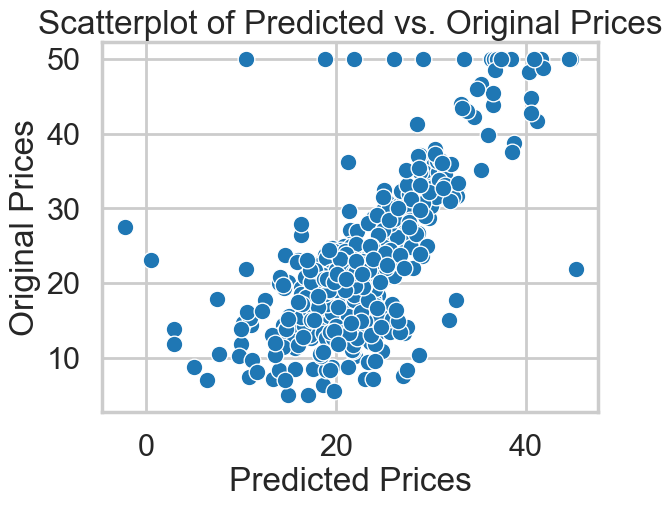

In [18]:
sns.scatterplot(x=m.fittedvalues, y=bos["PRICE"])
plt.xlabel("Predicted Prices")
plt.ylabel("Original Prices")
plt.title("Scatterplot of Predicted vs. Original Prices")

### Fitting Linear Regression using `sklearn`


In [19]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

In [20]:
# Look inside lm object
# lm.<tab>
y = bos["PRICE"]

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [21]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [22]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509025


In [23]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [24]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

features  estimatedCoefficients
0      CRIM              -0.108011
1        ZN               0.046420
2     INDUS               0.020559
3      CHAS               2.686734
4       NOX             -17.766611
5        RM               3.809865
6       AGE               0.000692
7       DIS              -1.475567
8       RAD               0.306049
9       TAX              -0.012335
10  PTRATIO              -0.952747
11        B               0.009312
12    LSTAT              -0.524758

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [25]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

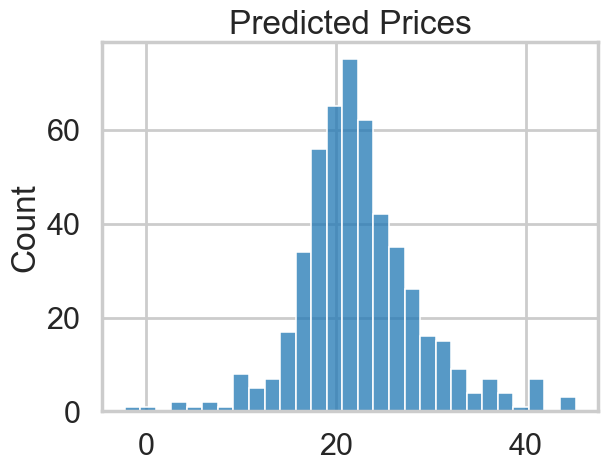

Text(0, 0.5, 'Actual Prices')

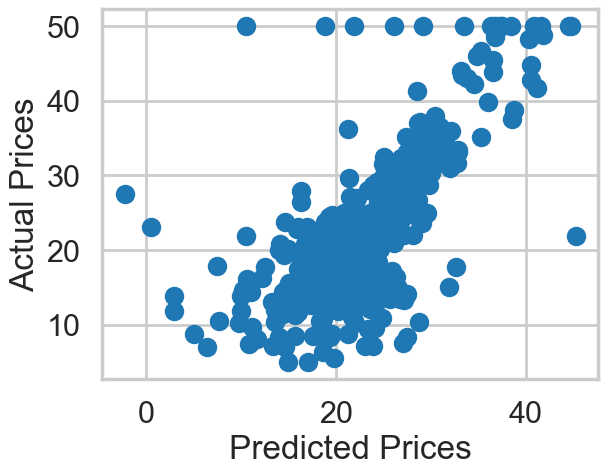

In [26]:

sns.histplot(m.fittedvalues)
plt.title("Predicted Prices")
plt.show()

plt.scatter(m.fittedvalues, bos["PRICE"])
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [27]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954975


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [28]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))


31637.51083706472


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

In [29]:

X = bos[['PTRATIO']]
X = sm.add_constant(X)
y = bos['PRICE']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.61e-34
Time:                        14:30:24   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.0

In [30]:

X = bos[['CRIM', 'RM', 'PTRATIO']]
X = sm.add_constant(X)
y = bos['PRICE']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           6.15e-98
Time:                        14:30:24   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.4

## Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

In [31]:
X = bos[['TAX', 'AGE']]
X = sm.add_constant(X)
y = bos['PRICE']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     81.95
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.56e-31
Time:                        14:30:24   Log-Likelihood:                -1768.9
No. Observations:                 506   AIC:                             3544.
Df Residuals:                     503   BIC:                             3556.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0600      1.058     33.124      0.0


## Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


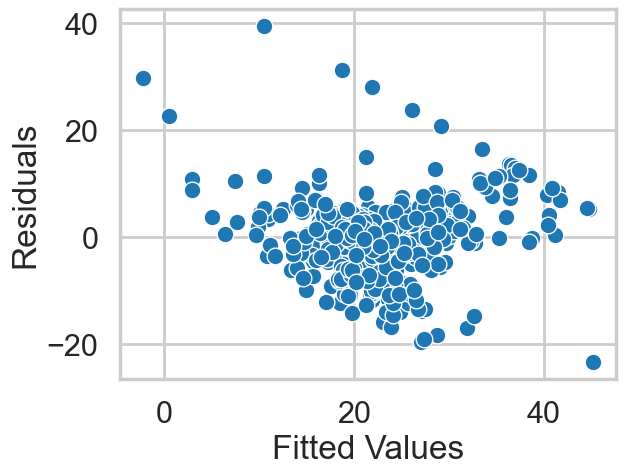

In [32]:

fitted_values = m.fittedvalues
residuals = m.resid

sns.scatterplot(x=fitted_values, y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

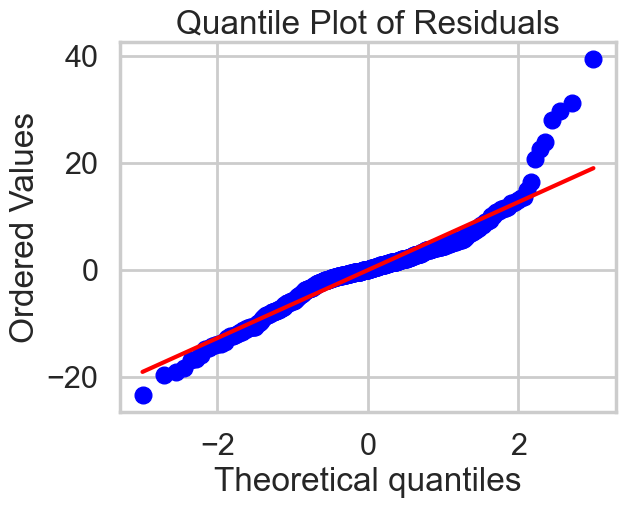

In [33]:

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Quantile Plot of Residuals")
plt.show()

In [34]:
#Exercise 4: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.
std_residuals = residuals / np.std(residuals)

#If the residuals are > 3 or < -3, then I'm calling them an outlier
outliers = bos[np.abs(std_residuals) > 3]
print(outliers)

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
364   3.47428  0.0   18.1   1.0  0.718  8.780   82.9  1.9047  24.0  666.0   
365   4.55587  0.0   18.1   0.0  0.718  3.561   87.9  1.6132  24.0  666.0   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
368   4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369   5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  PRICE  
364     20.2  354.55   5.29   21.9  
365     20.2  354.70   7.12   27.5  
367     20.2  131.42  13.33   23.1  
368     20.2  375.52   3.26   50.0  
369     20.2  375.33   3.73   50.0  
370     20.2  392.05   2.96   50.0  
371     20.2  366.15   9.53   50.0  
372     20

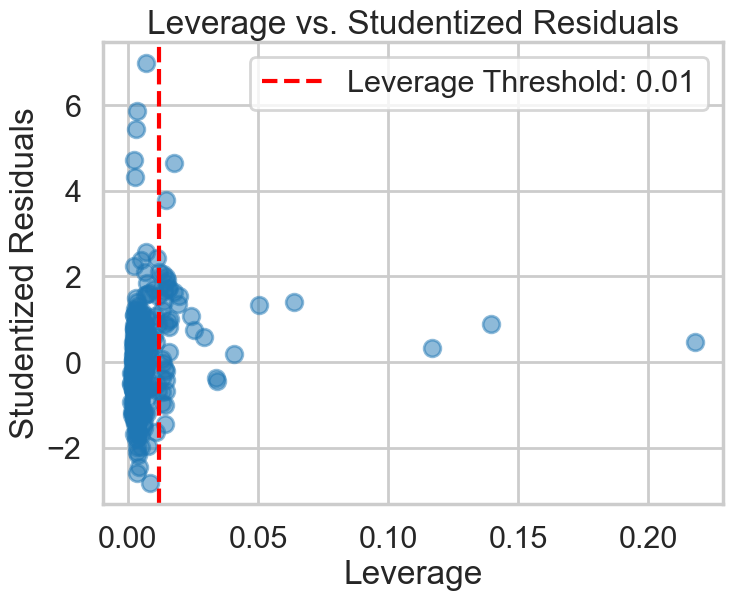

In [35]:
X = bos[['CRIM', 'RM', 'PTRATIO']]
y = bos['PRICE']
model = sm.OLS(y, X).fit()

influence = model.get_influence()
leverage = influence.hat_matrix_diag  # Leverage values
studentized_residuals = influence.resid_studentized_external

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, studentized_residuals, alpha=0.5)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title('Leverage vs. Studentized Residuals')

import numpy as np
n, p = X.shape
threshold = 2 * (p / n)
ax.axvline(threshold, color='r', linestyle='--', label=f'Leverage Threshold: {threshold:.2f}')
ax.legend()

plt.show()

Removing 45 influential points: {257, 386, 262, 267, 398, 400, 404, 405, 406, 407, 410, 283, 282, 413, 414, 412, 415, 417, 418, 163, 161, 162, 416, 166, 419, 427, 186, 195, 203, 204, 225, 228, 233, 364, 365, 366, 367, 368, 369, 370, 371, 372, 374, 375, 380}
Original:
                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              2727.
Date:                Sat, 21 Jun 2025   Prob (F-statistic):                   1.20e-310
Time:                        14:30:25   Log-Likelihood:                         -1612.3
No. Observations:                 506   AIC:                                      3231.
Df Residuals:                     503   BIC:                                      3243.
Df Model:                   

C:\Users\emcdo\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


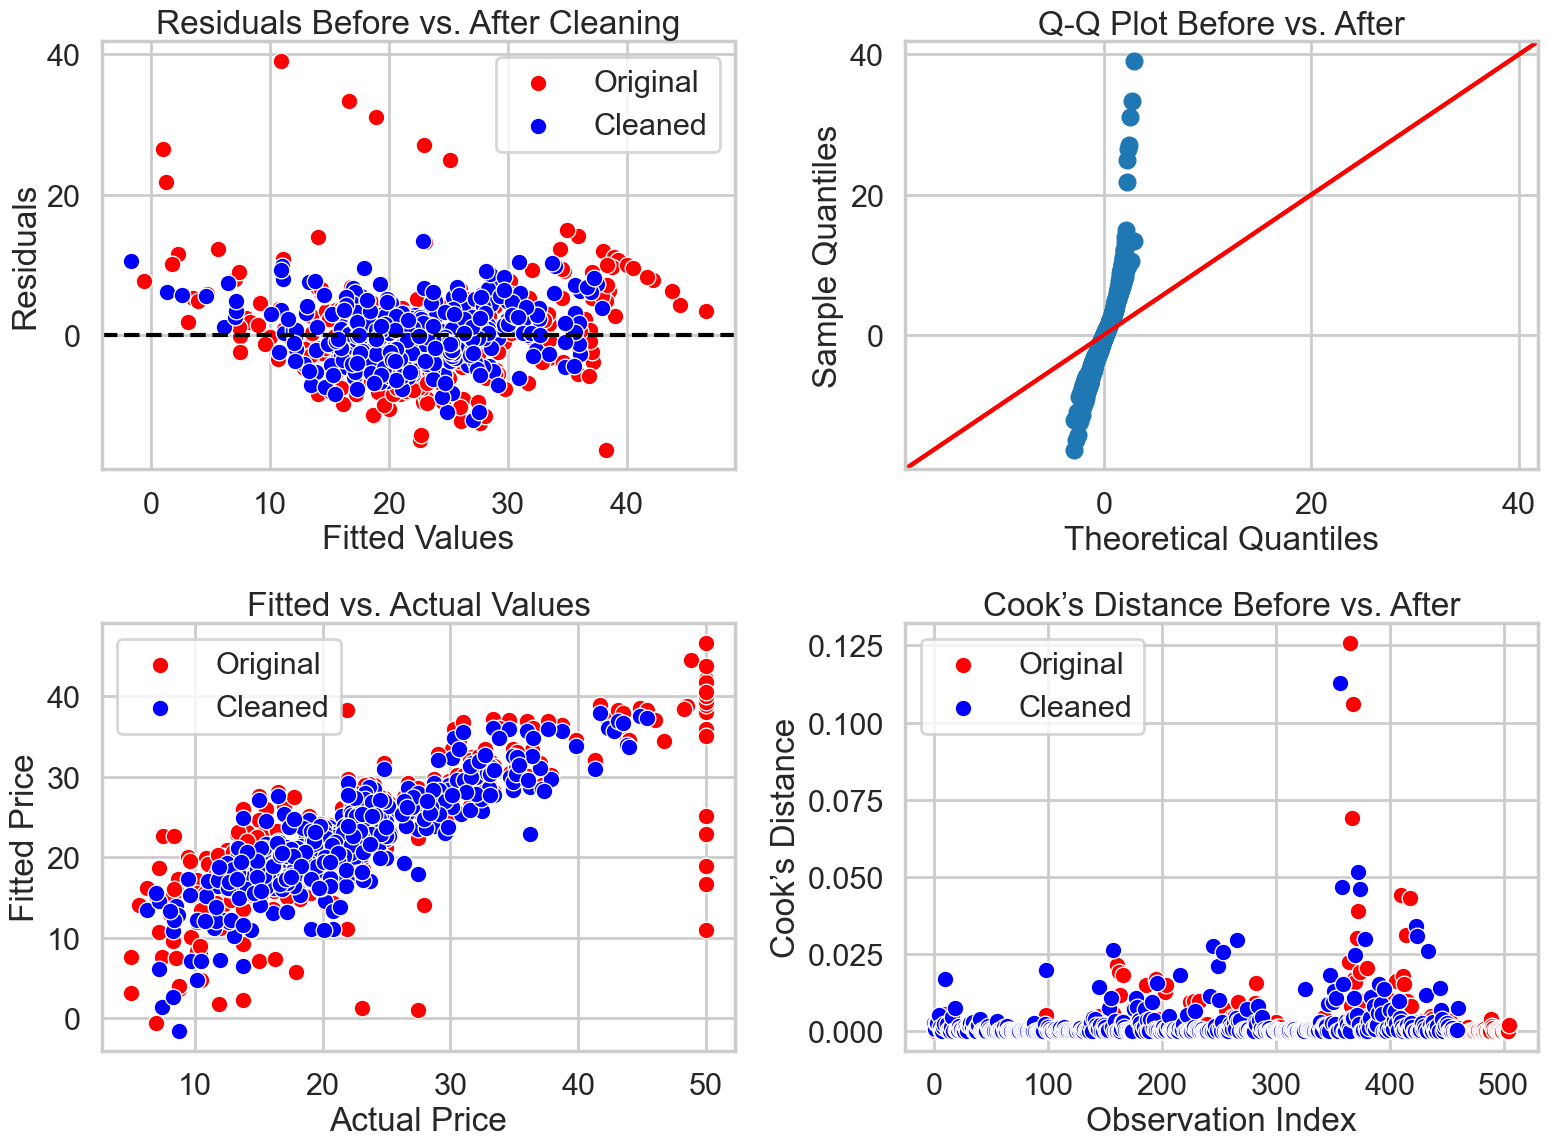

In [36]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag  
high_leverage_threshold = (2 * (X.shape[1] + 1)) / X.shape[0]
high_leverage_points = np.where(leverage > high_leverage_threshold)[0]

cooks_d, _ = influence.cooks_distance
cooks_threshold = 4 / len(X)
outliers = np.where(cooks_d > cooks_threshold)[0]

to_remove = set(high_leverage_points) | set(outliers)
print(f"Removing {len(to_remove)} influential points: {to_remove}")

X_clean = X.drop(index=to_remove)
y_clean = y.drop(index=to_remove)

model_clean = sm.OLS(y_clean, X_clean).fit()


print("Original:")
print(model.summary())

print("No Outliers")
print(model_clean.summary())


residuals_original = model.resid
residuals_cleaned = model_clean.resid
fitted_original = model.fittedvalues
fitted_cleaned = model_clean.fittedvalues

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x=fitted_original, y=residuals_original, ax=axes[0, 0], color="red", label="Original")
sns.scatterplot(x=fitted_cleaned, y=residuals_cleaned, ax=axes[0, 0], color="blue", label="Cleaned")
axes[0, 0].axhline(0, color='black', linestyle='dashed')
axes[0, 0].set_title("Residuals Before vs. After Cleaning")
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Residuals")

sm.qqplot(residuals_original, line='45', ax=axes[0, 1], color='red', label="Original")
sm.qqplot(residuals_cleaned, line='45', ax=axes[0, 1], color='blue', label="Cleaned")
axes[0, 1].set_title("Q-Q Plot Before vs. After")


sns.scatterplot(x=y, y=fitted_original, ax=axes[1, 0], color="red", label="Original")
sns.scatterplot(x=y_clean, y=fitted_cleaned, ax=axes[1, 0], color="blue", label="Cleaned")
axes[1, 0].set_title("Fitted vs. Actual Values")
axes[1, 0].set_xlabel("Actual Price")
axes[1, 0].set_ylabel("Fitted Price")

cooks_original, _ = model.get_influence().cooks_distance
cooks_cleaned, _ = model_clean.get_influence().cooks_distance
sns.scatterplot(x=np.arange(len(cooks_original)), y=cooks_original, ax=axes[1, 1], color="red", label="Original")
sns.scatterplot(x=np.arange(len(cooks_cleaned)), y=cooks_cleaned, ax=axes[1, 1], color="blue", label="Cleaned")
axes[1, 1].set_title("Cook’s Distance Before vs. After")
axes[1, 1].set_xlabel("Observation Index")
axes[1, 1].set_ylabel("Cook’s Distance")

plt.tight_layout()
plt.legend()
plt.show()